In [137]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [138]:
# Connect to the SQLite database
conn = sqlite3.connect("D:/SoccerPredict/dataSet/database.sqlite")

# Load data from the database
matches = pd.read_sql_query("SELECT * FROM Match", conn)
teams = pd.read_sql_query("SELECT * FROM Team", conn)
leagues = pd.read_sql_query("SELECT * FROM League", conn)

# Close the database connection
conn.close()

In [139]:
# Basic inspection of the matches DataFrame
print(matches.head())
print(f"The 'matches' DataFrame has {matches.shape[0]} rows and {matches.shape[1]} columns.")
print("Columns in 'matches' DataFrame:")
print(matches.columns)

   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...  \
0        492473              9987              9993               1  ...   
1        492474             10000              9994               0  ...   
2        492475              9984              8635               0  ...   
3        492476              9991              9998               5  ...   
4        492477              7947              9985               1  ...   

    SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  4.00  1.65  3.40  4.50  1.78  3.25  4.00  1.73  3

In [140]:
# Check data types and non-null values
print(matches.info())
print(matches.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB
None
                 id    country_id     league_id         stage  match_api_id  \
count  25979.000000  25979.000000  25979.000000  25979.000000  2.597900e+04   
mean   12990.000000  11738.630317  11738.630317     18.242773  1.195429e+06   
std     7499.635658   7553.936759   7553.936759     10.407354  4.946279e+05   
min        1.000000      1.000000      1.000000      1.000000  4.831290e+05   
25%     6495.500000   4769.000000   4769.000000      9.000000  7.684365e+05   
50%    12990.000000  10257.000000  10257.000000     18.000000  1.147511e+06   
75%    19484.500000  17642.000000  17642.000000     27.000000  1.709852e+06   
max    25979.000000  24558.000000  24558.000000     38.000000  2.216672e+06   

       home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
count      25979.000000      2597

In [141]:
# Check for missing values
print("Missing values in 'matches' DataFrame:")
print(matches.isnull().sum()[matches.isnull().sum() > 0])

print("Missing values in 'teams' DataFrame:")
print(teams.isnull().sum()[teams.isnull().sum() > 0])

print("Missing values in 'leagues' DataFrame:")
print(leagues.isnull().sum()[leagues.isnull().sum() > 0])

Missing values in 'matches' DataFrame:
home_player_X1     1821
home_player_X2     1821
home_player_X3     1832
home_player_X4     1832
home_player_X5     1832
                  ...  
GBD               11817
GBA               11817
BSH               11818
BSD               11818
BSA               11818
Length: 104, dtype: int64
Missing values in 'teams' DataFrame:
team_fifa_api_id    11
dtype: int64
Missing values in 'leagues' DataFrame:
Series([], dtype: int64)


In [142]:
# Preview additional tables
print("Teams DataFrame:")
print(teams.head())
print("Leagues DataFrame:")
print(leagues.head())

Teams DataFrame:
   id  team_api_id  team_fifa_api_id     team_long_name team_short_name
0   1         9987             673.0           KRC Genk             GEN
1   2         9993             675.0       Beerschot AC             BAC
2   3        10000           15005.0   SV Zulte-Waregem             ZUL
3   4         9994            2007.0   Sporting Lokeren             LOK
4   5         9984            1750.0  KSV Cercle Brugge             CEB
Leagues DataFrame:
      id  country_id                    name
0      1           1  Belgium Jupiler League
1   1729        1729  England Premier League
2   4769        4769          France Ligue 1
3   7809        7809   Germany 1. Bundesliga
4  10257       10257           Italy Serie A


In [143]:
# Feature engineering
matches['goal_difference'] = matches['home_team_goal'] - matches['away_team_goal']
matches['home_win'] = (matches['home_team_goal'] > matches['away_team_goal']).astype(int)

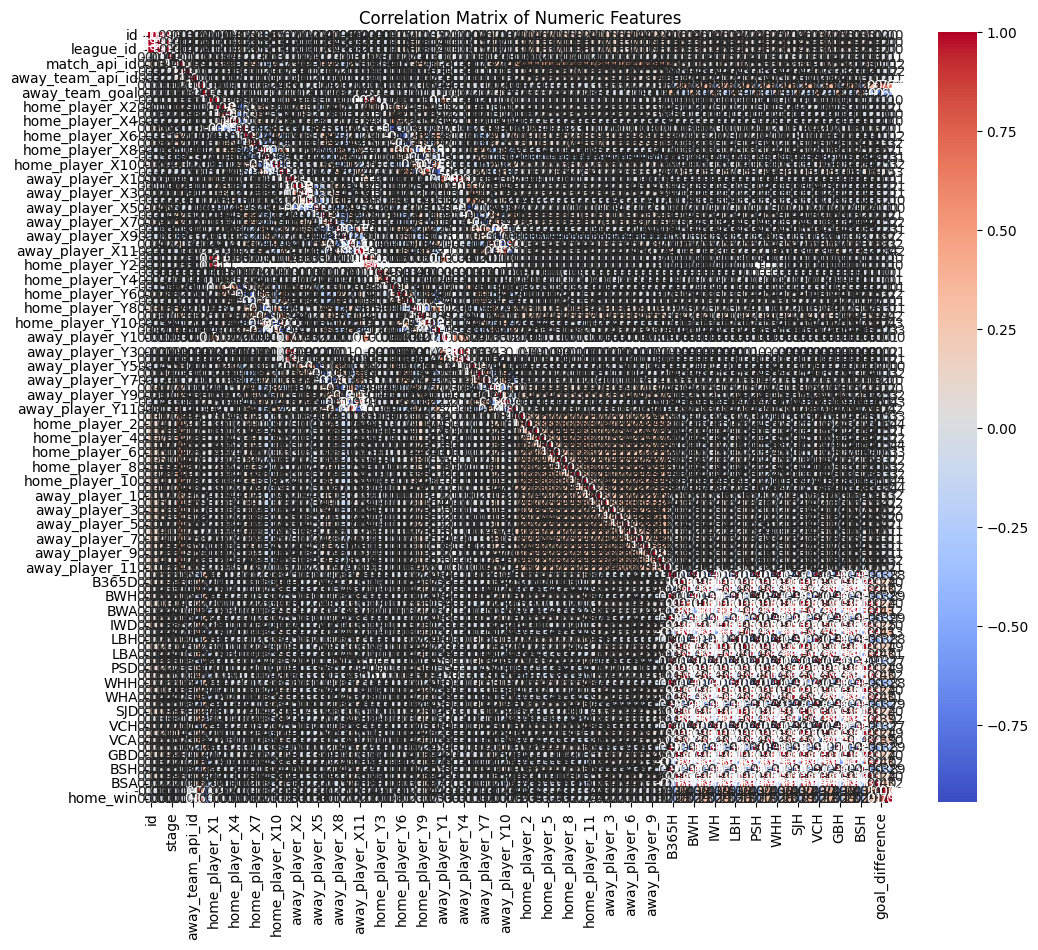

In [144]:
# Visualization of numerical features
numeric_columns = matches.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [145]:
# Label encoding for 'stage'
label_encoder = LabelEncoder()
matches['stage_encoded'] = label_encoder.fit_transform(matches['stage'])

# Check data types again after encoding
print(matches.dtypes)

id                   int64
country_id           int64
league_id            int64
season              object
stage                int64
                    ...   
BSD                float64
BSA                float64
goal_difference      int64
home_win             int32
stage_encoded        int64
Length: 118, dtype: object


In [146]:
# Handle missing values
matches_cleaned = matches.dropna()

In [147]:
# Convert date column to datetime and convert 'season' to category
matches['date'] = pd.to_datetime(matches['date'])
matches['season'] = matches['season'].astype('category')

In [148]:
# Ensure correct data types for analysis
print(matches.dtypes)

id                    int64
country_id            int64
league_id             int64
season             category
stage                 int64
                     ...   
BSD                 float64
BSA                 float64
goal_difference       int64
home_win              int32
stage_encoded         int64
Length: 118, dtype: object


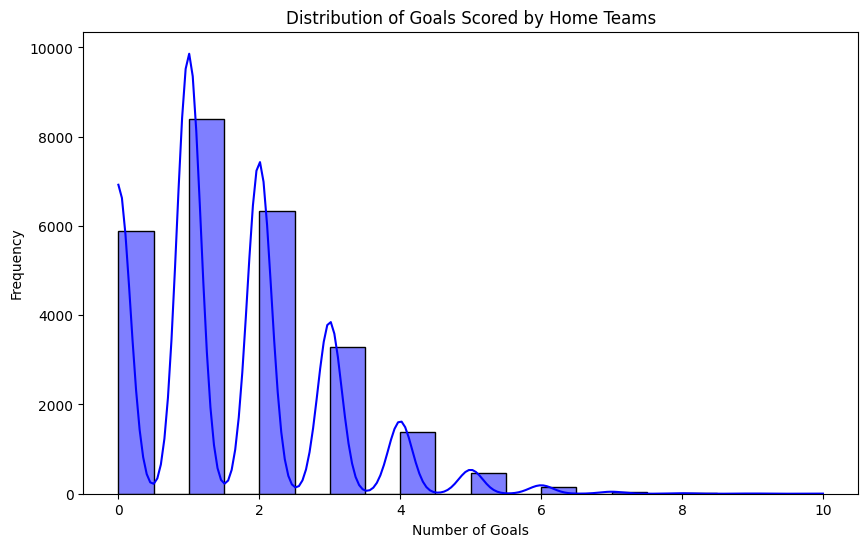

In [149]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(matches['home_team_goal'], bins=20, kde=True, color='blue')
plt.title('Distribution of Goals Scored by Home Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.show()

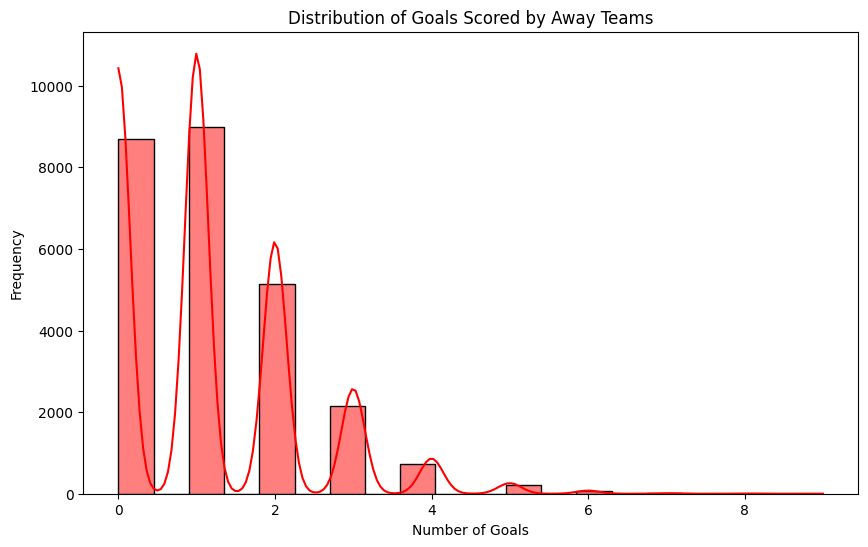

In [150]:
plt.figure(figsize=(10, 6))
sns.histplot(matches['away_team_goal'], bins=20, kde=True, color='red')
plt.title('Distribution of Goals Scored by Away Teams')
plt.xlabel('Number of Goals')
plt.ylabel('Frequency')
plt.show()

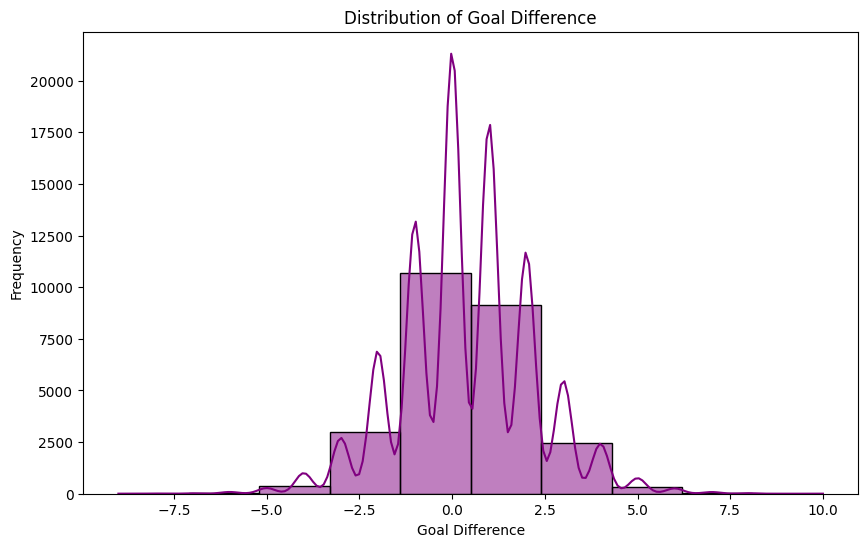

In [151]:
plt.figure(figsize=(10, 6))
sns.histplot(matches['goal_difference'], bins=10, kde=True, color='purple')
plt.title('Distribution of Goal Difference')
plt.xlabel('Goal Difference')
plt.ylabel('Frequency')
plt.show()

C:\Users\123bb\AppData\Local\Temp\ipykernel_21100\587364454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='home_win', data=matches, palette='Set2')


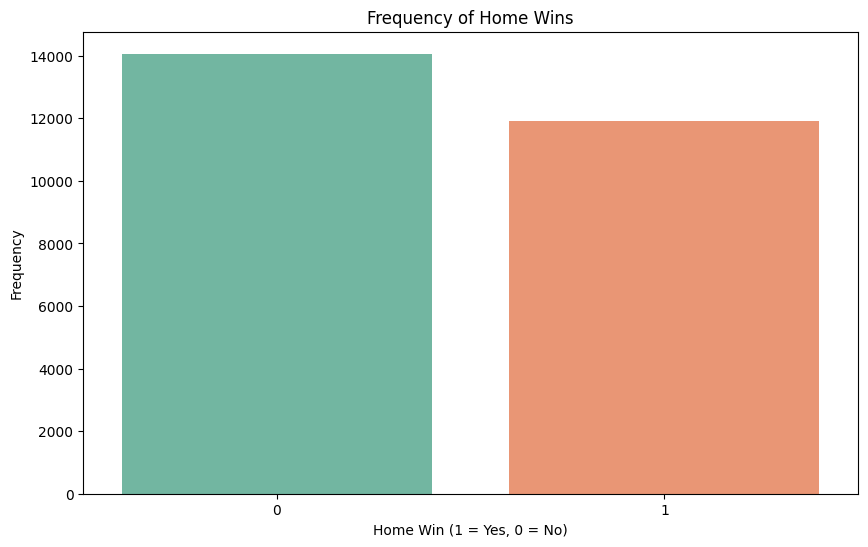

In [152]:
plt.figure(figsize=(10, 6))
sns.countplot(x='home_win', data=matches, palette='Set2')
plt.title('Frequency of Home Wins')
plt.xlabel('Home Win (1 = Yes, 0 = No)')
plt.ylabel('Frequency')
plt.show()

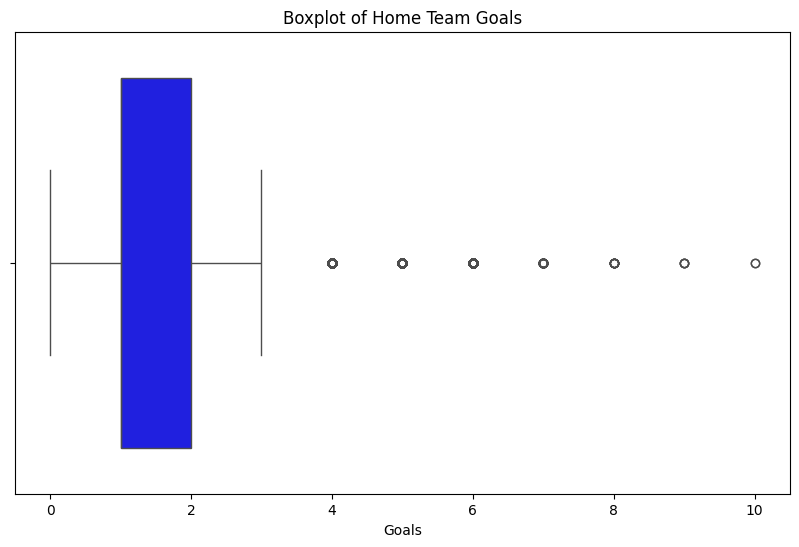

In [153]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=matches['home_team_goal'], color='blue')
plt.title('Boxplot of Home Team Goals')
plt.xlabel('Goals')
plt.show()

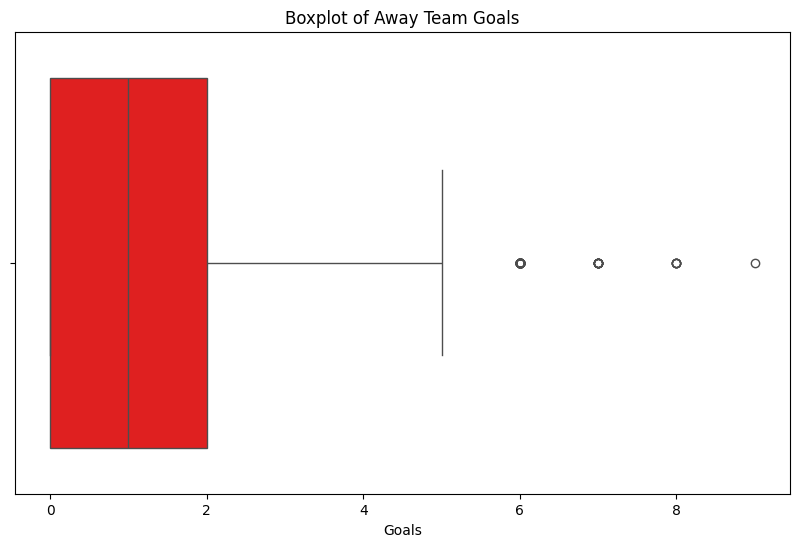

In [154]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=matches['away_team_goal'], color='red')
plt.title('Boxplot of Away Team Goals')
plt.xlabel('Goals')
plt.show()

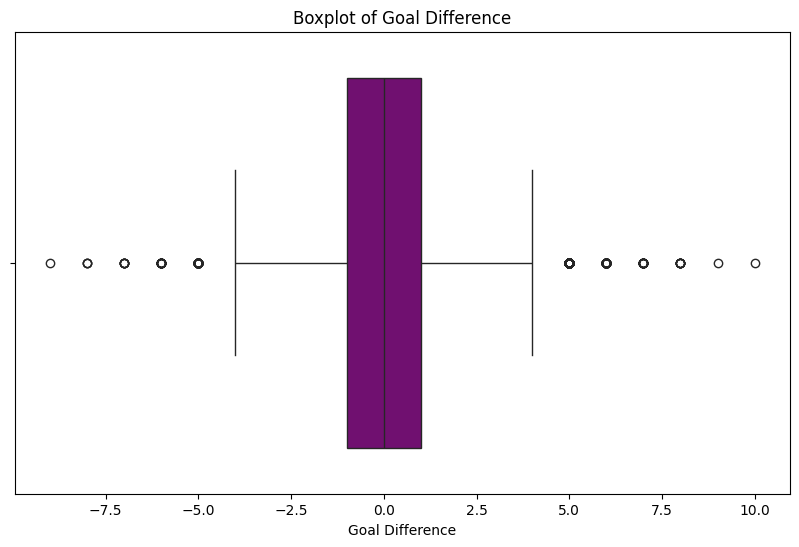

In [155]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=matches['goal_difference'], color='purple')
plt.title('Boxplot of Goal Difference')
plt.xlabel('Goal Difference')
plt.show()

In [156]:
# Remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

matches = remove_outliers(matches, 'home_team_goal')
matches = remove_outliers(matches, 'away_team_goal')

In [157]:
# One-hot encoding for categorical variables
matches = pd.get_dummies(matches, columns=['season', 'stage'], drop_first=True)


In [158]:
# Creating new features
matches['home_goal_ratio'] = matches['home_team_goal'] / (matches['home_team_goal'] + matches['away_team_goal'])
matches['away_goal_ratio'] = matches['away_team_goal'] / (matches['home_team_goal'] + matches['away_team_goal'])

In [159]:
# Feature selection
features = matches.drop(columns=['home_win'])
target = matches['home_win']

In [160]:
# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [161]:
# Ensure that only numeric columns are selected
numeric_features = features.select_dtypes(include=[np.number])

# Define the feature set and target variable
X = numeric_features
y = target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Drop non-numeric columns
numeric_features = features.select_dtypes(include=[np.number])
X_train = numeric_features.loc[X_train.index]
X_test = numeric_features.loc[X_test.index]

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shapes to confirm the scaling
print(X_train_scaled.shape, X_test_scaled.shape)


(19076, 108) (4769, 108)


In [162]:
print("NaNs in X_train:")
print(pd.DataFrame(X_train).isna().sum())

print("NaNs in X_test:")
print(pd.DataFrame(X_test).isna().sum())


NaNs in X_train:
id                     0
country_id             0
league_id              0
match_api_id           0
home_team_api_id       0
                    ... 
BSA                 8696
goal_difference        0
stage_encoded          0
home_goal_ratio     1569
away_goal_ratio     1569
Length: 108, dtype: int64
NaNs in X_test:
id                     0
country_id             0
league_id              0
match_api_id           0
home_team_api_id       0
                    ... 
BSA                 2173
goal_difference        0
stage_encoded          0
home_goal_ratio      409
away_goal_ratio      409
Length: 108, dtype: int64


In [163]:
# Drop rows with NaN values from features
X = X.dropna()

# Drop corresponding rows in the target variable
y = y[X.index]

# Split the cleaned data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reapply scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [164]:
# Fill NaN values with the mean of each column
X = X.fillna(X.mean())

# Split the cleaned data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reapply scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [165]:
print("NaNs in X_train_scaled:")
print(pd.DataFrame(X_train_scaled).isna().sum())

print("NaNs in X_test_scaled:")
print(pd.DataFrame(X_test_scaled).isna().sum())


NaNs in X_train_scaled:
0      0
1      0
2      0
3      0
4      0
      ..
103    0
104    0
105    0
106    0
107    0
Length: 108, dtype: int64
NaNs in X_test_scaled:
0      0
1      0
2      0
3      0
4      0
      ..
103    0
104    0
105    0
106    0
107    0
Length: 108, dtype: int64


In [166]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [167]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)


In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[252   0]
 [  0 189]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       252
           1       1.00      1.00      1.00       189

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



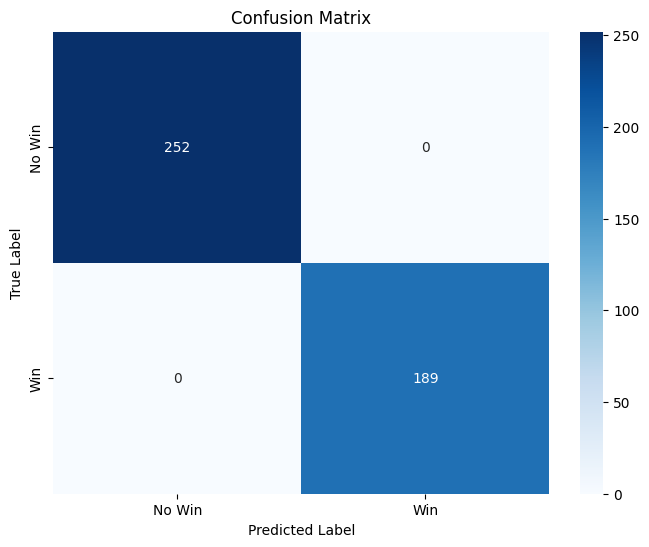

In [169]:
import seaborn as sns

# Heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Win', 'Win'], yticklabels=['No Win', 'Win'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [170]:
# For logistic regression, you can inspect the coefficients
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame for visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

print("Feature Importances:")
print(coef_df)


Feature Importances:
             Feature  Coefficient
104  goal_difference     3.739359
6     home_team_goal     3.072878
106  home_goal_ratio     2.736083
15    home_player_X8     0.090429
28   away_player_X10     0.088727
..               ...          ...
87               PSD    -0.109886
26    away_player_X8    -0.132988
51   away_player_Y11    -0.163843
7     away_team_goal    -2.677221
107  away_goal_ratio    -2.736083

[108 rows x 2 columns]
